# Advanced Topics -- Heat Maps

## Importing relevant modules

We need to import `parcels` itself along with `matplotlib`, `xarray`, and `datetime`.

In [1]:
import xarray as xr
from xhistogram.xarray import histogram as xhist
import numpy as np

## Load data

Let's use the output from the drift kernel experiments.

In [2]:
ds = xr.open_zarr("GlobCurrentParticles_eastward_drift.zarr").compute()
ds = ds.isel(obs=slice(1, None))
ds

<xarray.Dataset> Size: 5MB
Dimensions:     (trajectory: 1000, obs: 240)
Coordinates:
  * obs         (obs) int32 960B 1 2 3 4 5 6 7 8 ... 234 235 236 237 238 239 240
  * trajectory  (trajectory) int64 8kB 0 1 2 3 4 5 6 ... 994 995 996 997 998 999
Data variables:
    lat         (trajectory, obs) float32 960kB -38.21 -38.18 -38.15 ... nan nan
    lon         (trajectory, obs) float32 960kB 24.12 24.22 24.32 ... nan nan
    time        (trajectory, obs) datetime64[ns] 2MB 2002-01-01T01:00:00 ... NaT
    z           (trajectory, obs) float32 960kB 0.0 0.0 0.0 0.0 ... nan nan nan
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        JITParticleAdvectionRK4EastwardDriftCheckError
    parcels_mesh:           spherical
    parcels_version:        3.0.4

## Calculate time (obs) resolved histograms

Let's create 20 x 20 bins covering the whole particle cloud.

In [3]:
lon_bins = np.linspace(ds.lon.min().data[()], ds.lon.max().data[()], 21)
lat_bins = np.linspace(ds.lat.min().data[()], ds.lat.max().data[()], 21)

In [4]:
obs_counts = xhist(
    ds.lon, ds.lat,
    bins=[lon_bins, lat_bins],
    dim=["trajectory", ],
    bin_dim_suffix=""
)

obs_counts

<xarray.DataArray 'histogram_lon_lat' (obs: 240, lon: 20, lat: 20)> Size: 768kB
array([[[ 0,  0,  5, ...,  8, 13,  7],
        [ 0,  0, 15, ...,  9, 10, 11],
        [ 0,  1, 12, ...,  5, 15,  8],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       [[ 0,  0,  6, ...,  8, 12,  7],
        [ 0,  2, 12, ...,  9, 12, 10],
        [ 0,  1, 14, ...,  5, 16,  5],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       [[ 0,  0,  5, ...,  8, 10,  5],
        [ 0,  4, 10, ...,  7, 13,  9],
        [ 0,  2, 15, ...,  5, 15,  8],
        ...,
...
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]]])
Coordinates:
  * obs      (obs) int32 960B 1 2 3 4 5 6 7 8 ... 234 235 236 237 238 239 240
  * lon      (lon) float64 160B 24.3 24.84 25.38 25.92 ... 33.52 34.07 34.61
  * lat      (lat) float64 160B -39.36 -39.11 -38.86 ... -35.11 -34.86 -34.61

## Have a look

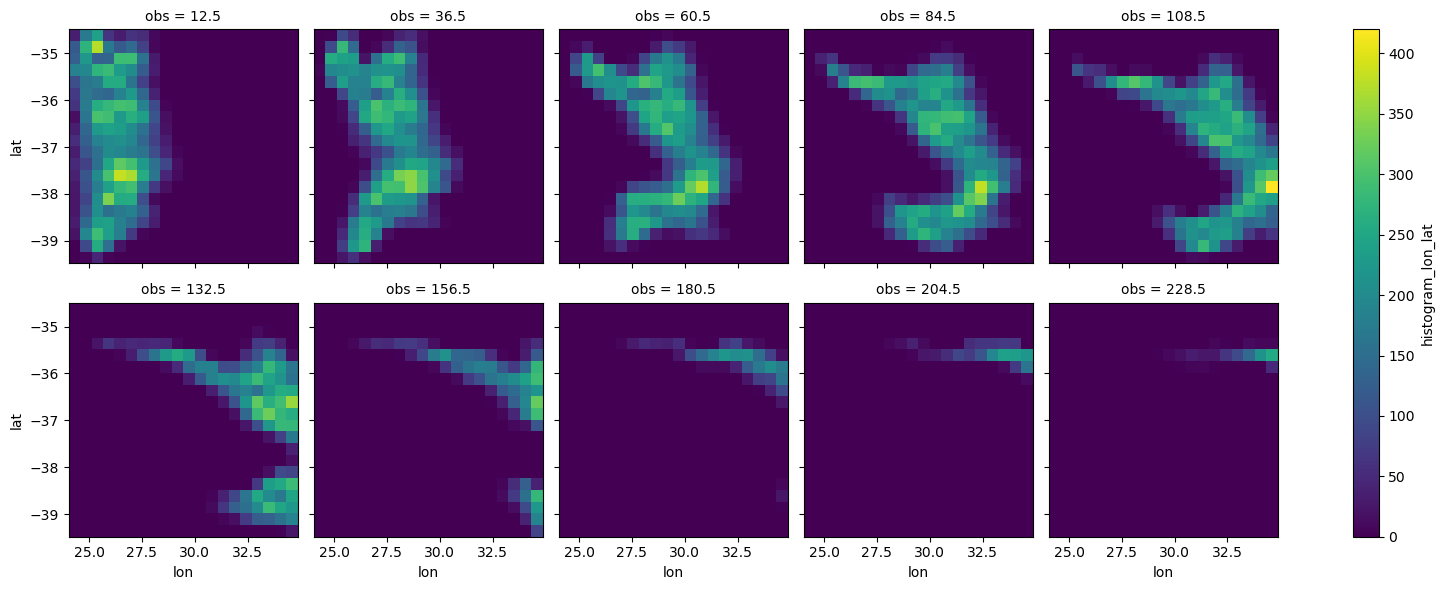

In [5]:
obs_counts.coarsen(obs=24, boundary="trim").sum().plot(x="lon", y="lat", col="obs", col_wrap=5)